# Trying Bluequbit platform


In [1]:
!pip install bluequbit

     ---------------------------------------- 41.4/41.4 kB 1.0 MB/s eta 0:00:00


In [12]:
import bluequbit

from bluequbit.library import multi_adder
from qiskit import QuantumCircuit
from math import ceil, log2

from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile


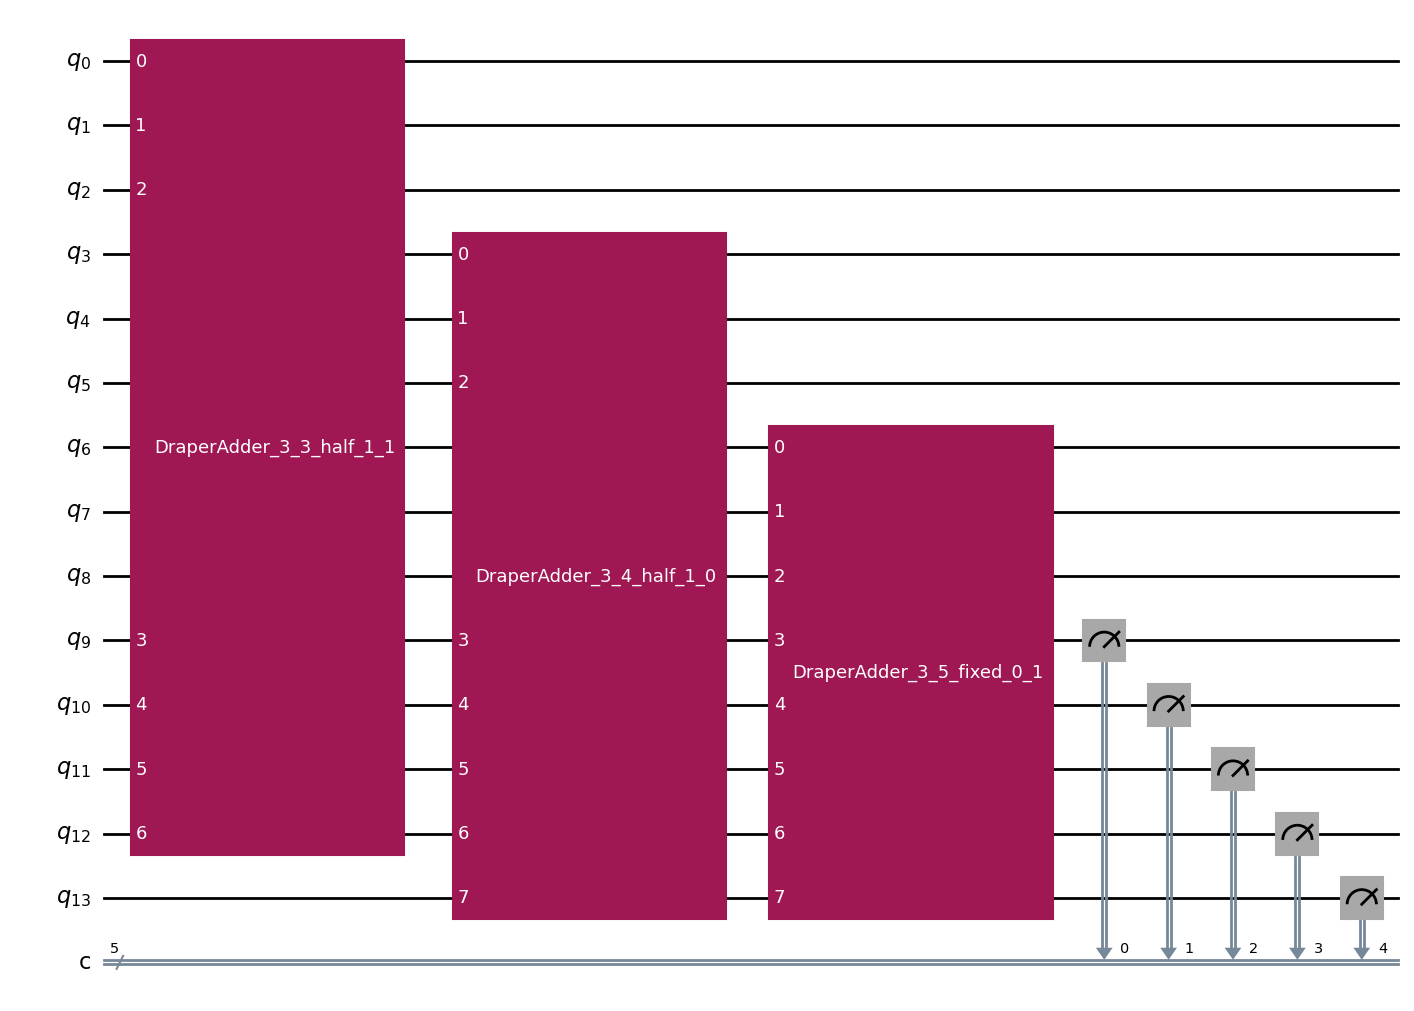

In [9]:
m = 4 # number of registers
n = 3 # number of qubits in each register

num_sum_qubits = int(ceil(log2(m * (2**n - 1) + 0.5)))  # number of qubits required to store the sum
num_qubits = m * n + num_sum_qubits - n

qc = QuantumCircuit(num_qubits, num_sum_qubits)
#qc.h(range(m * n))  # Now each register is in superposition of 0, 1, 2, 3, 4, 5, 6, 7
qc.compose(multi_adder(m, n), inplace=True)
qc.measure(range(num_qubits-num_sum_qubits, num_qubits), range(num_sum_qubits))

qc.draw('mpl')

## Running the circuit using standard Qiskit simulator AerSimulator

['time elapsed: 0.032001495361328125 sec']


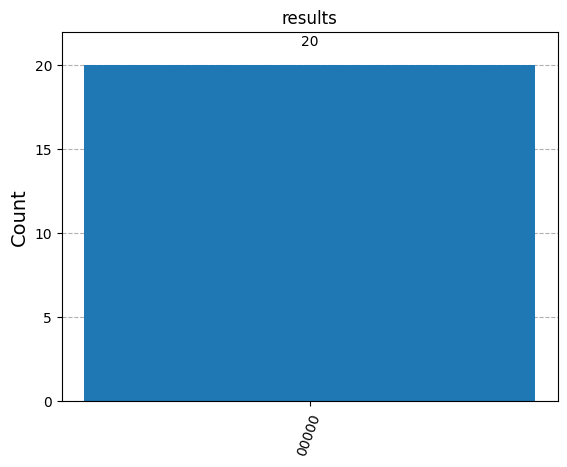

In [10]:
import time
start = time.time()
shot_num = 20
simulator = AerSimulator()

qc = transpile(qc, backend = simulator)
result = simulator.run(qc,shots = 20).result()
counts = result.get_counts(qc)
end = time.time()
print(['time elapsed: ' + str(end - start) + ' sec'])
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

## Running circuit using BlueQubit cloud simulator 

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: lQ39SlWJdNuHPNI0, device: gpu, run status: COMPLETED, created on: 2024-10-25 21:53:36 UTC, cost: $0.20, run time: 30 ms, queue time: 16 ms, num qubits: 14


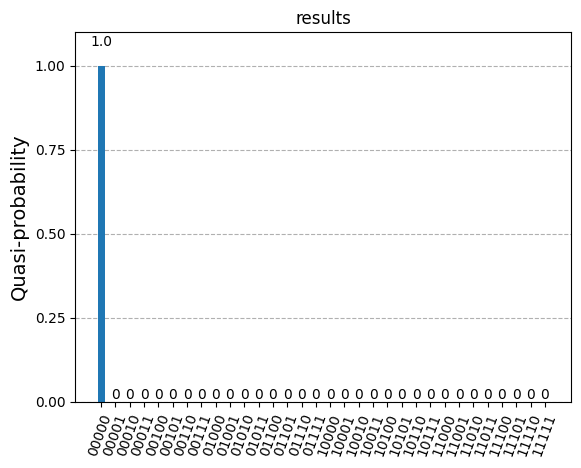

In [16]:
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(qc, device = 'gpu')
counts = result.get_counts()
plot_histogram(counts, title = 'results')